In [92]:
!pip install seaborn 
!pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [95]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [96]:
df.drop(['Booking_ID'], inplace=True, axis=1)


In [97]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [98]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [99]:
df.duplicated().sum()

np.int64(7661)

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df.shape

(21359, 18)

In [102]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].value_counts())
  print("\n")

Column: no_of_adults
no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64


Column: no_of_children
no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64


Column: no_of_weekend_nights
no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64


Column: no_of_week_nights
no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64


Column: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64


Column: required_car_parking_space
required_car_parking_space
0    20452
1      907
Name: count, dtype: int64


Column: room_type_reserved
room_type_reserved
Room_Type

###Imbalanced Data

In [103]:
print("types_of_columns")
categorical_columns = ["type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "market_segment_type", "repeated_guest", "booking_status"]

# numerical_columns = df.columns.difference(categorical_columns)
# print("Categorical columns:", categorical_columns)
# print("\n")
# print("\n")
# print("Numerical columns:", numerical_columns)


types_of_columns


In [104]:
numerical_columns = ['arrival_date', 'arrival_month', 'arrival_year', 'avg_price_per_room',
       'lead_time', 'market_segment_type', 'no_of_adults', 'no_of_children',
       'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations',
       'no_of_special_requests', 'no_of_week_nights', 'no_of_weekend_nights']

In [105]:
data= df.copy()

# UNIVARIATE ANALYSIS

In [106]:
def num_plot_distribution(data, column):
    
    for i,column in enumerate(column):
      sns.histplot(data[column], kde=True, bins=30)
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.show()

      sns.boxplot(x=data[column])
      plt.title(f'Boxplot of {column}')
      plt.xlabel(column)

      plt.tight_layout()
      plt.show()

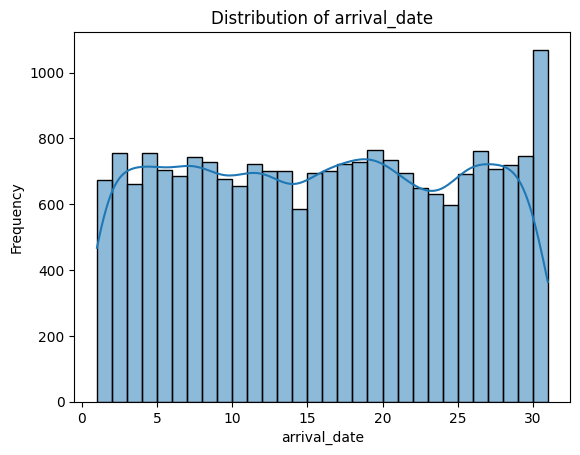

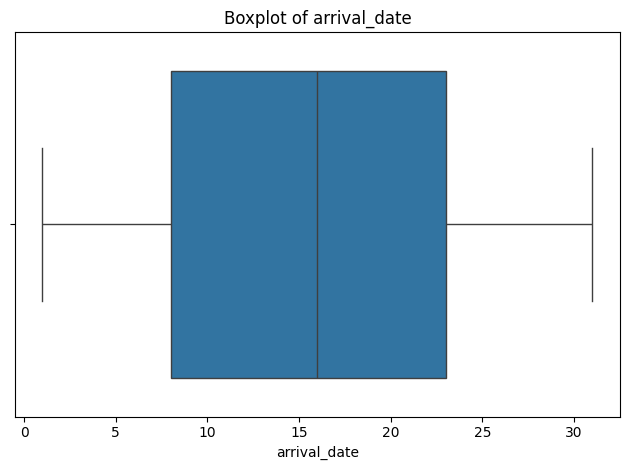

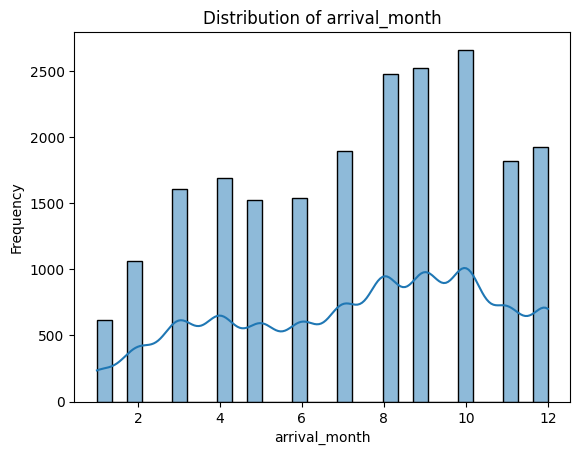

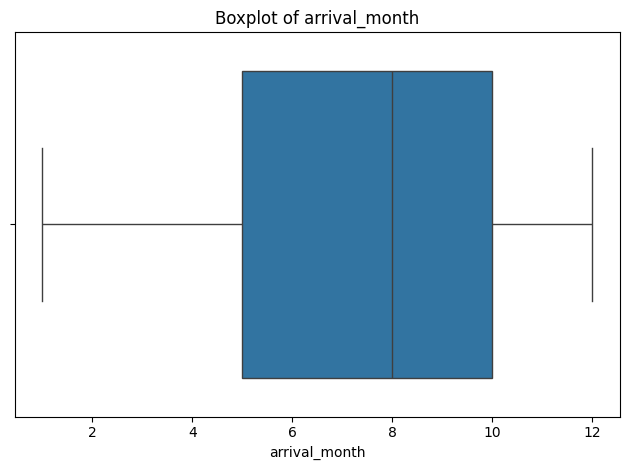

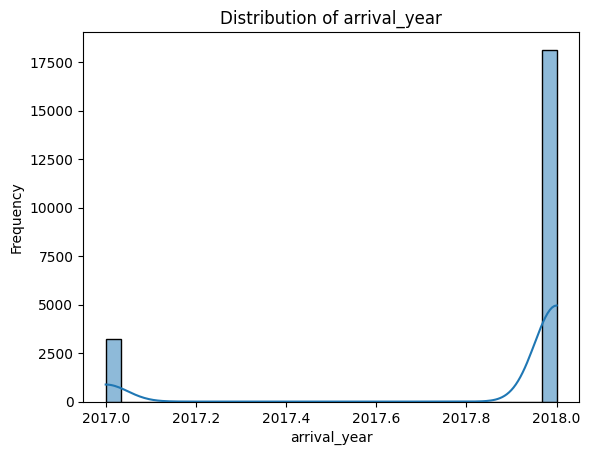

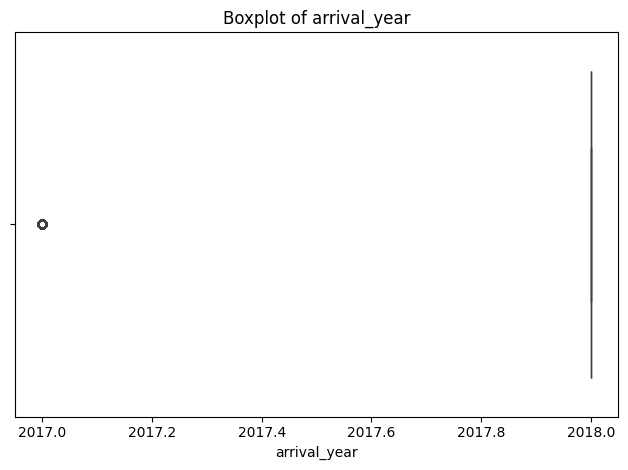

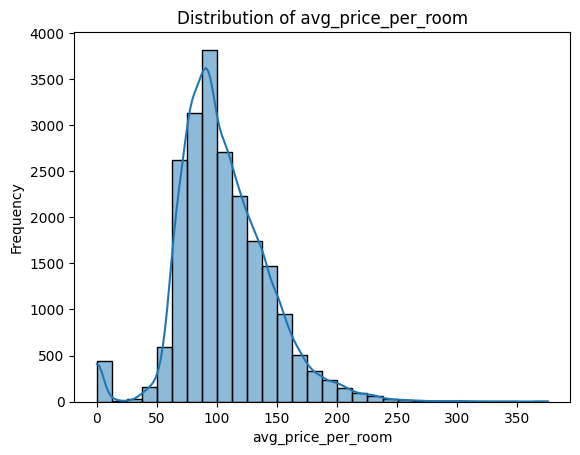

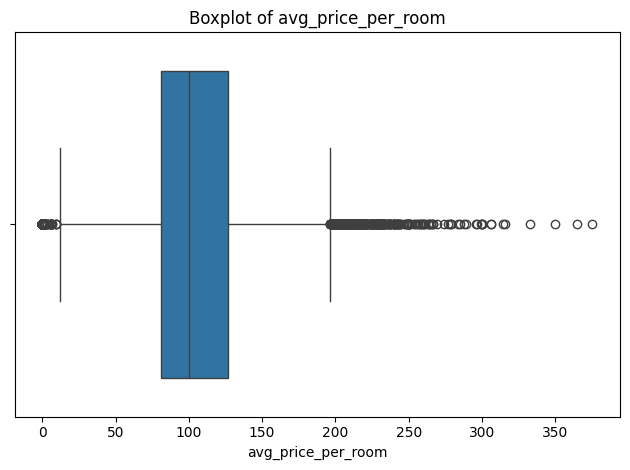

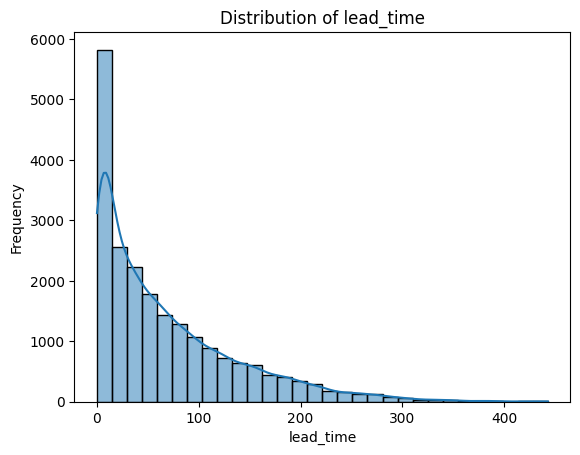

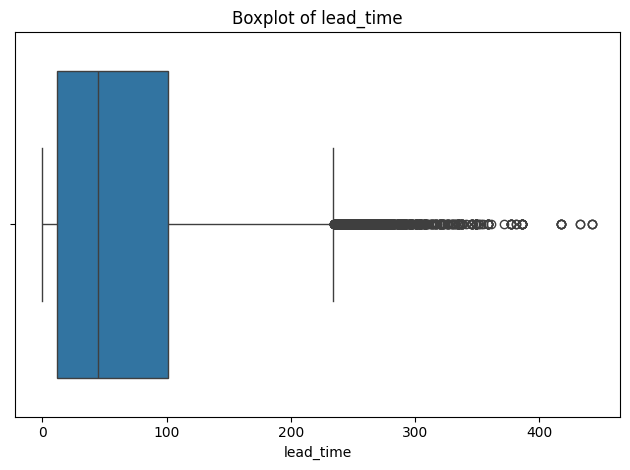

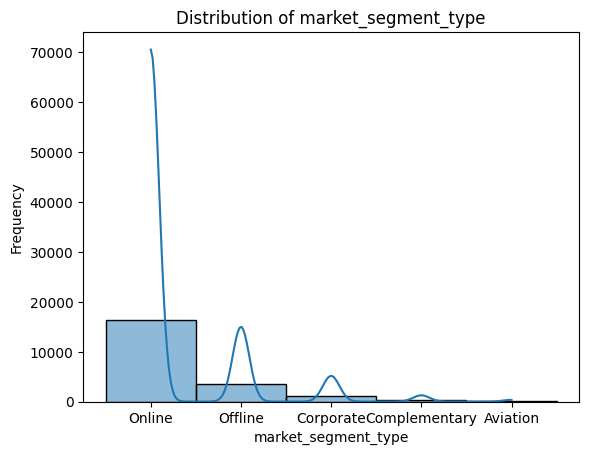

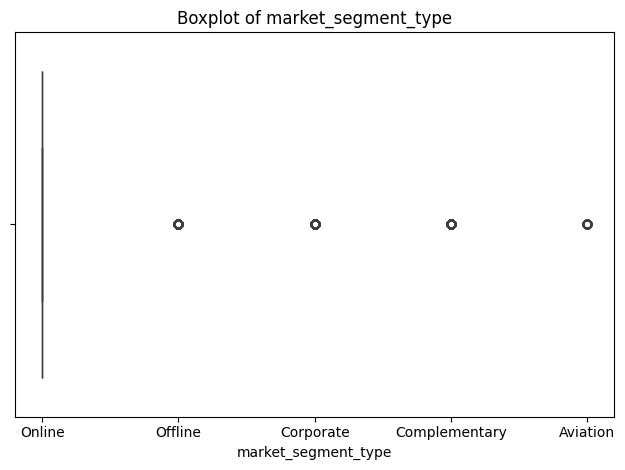

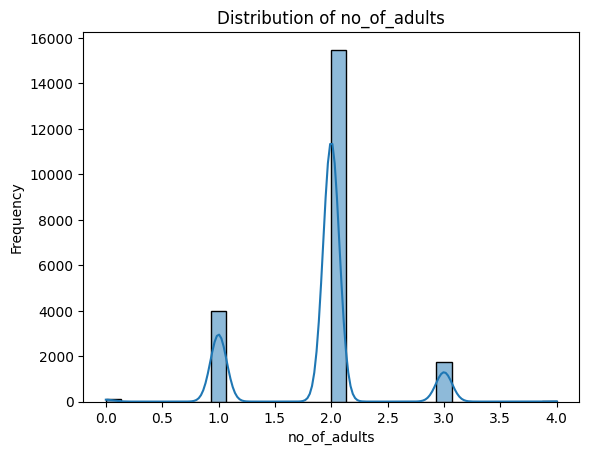

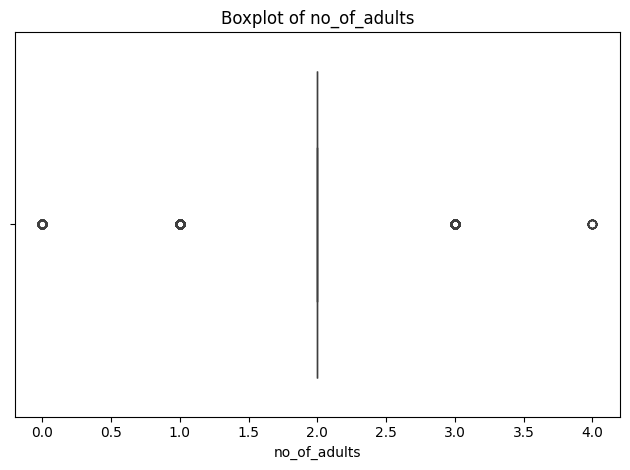

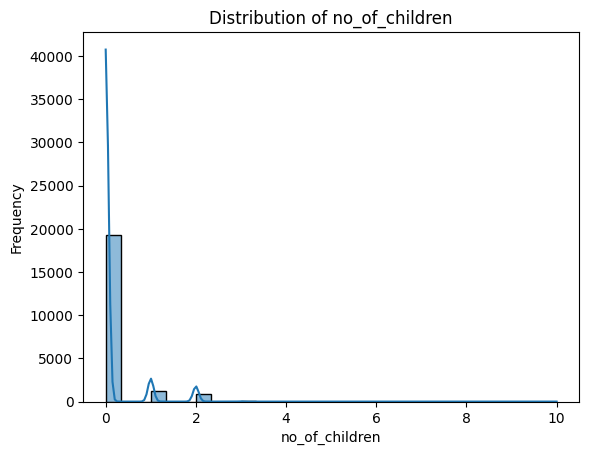

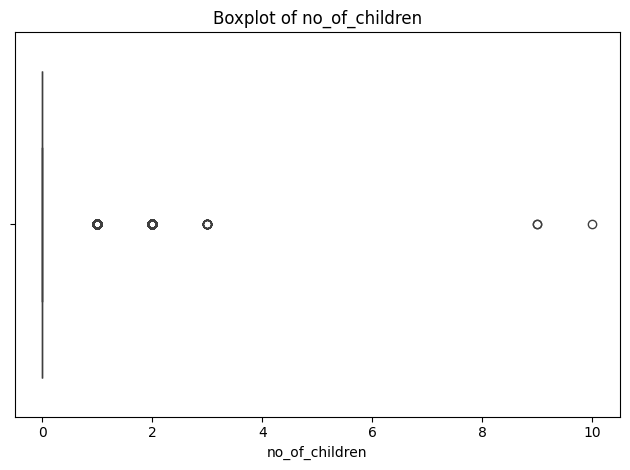

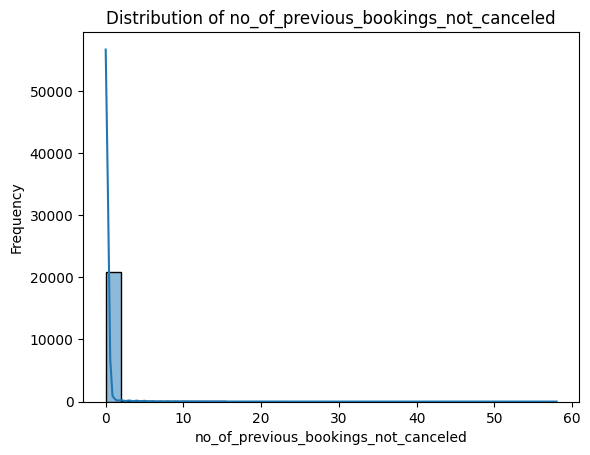

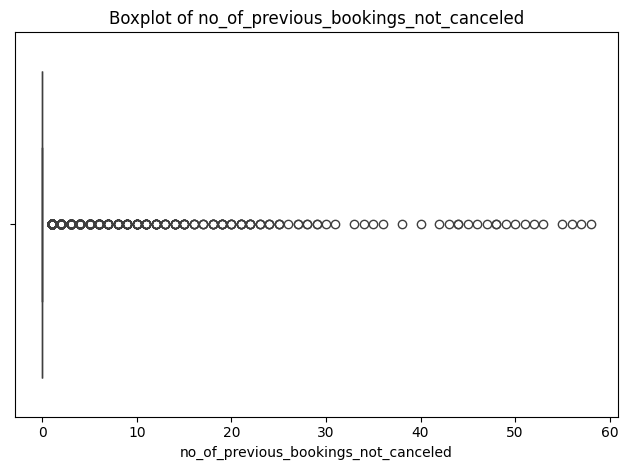

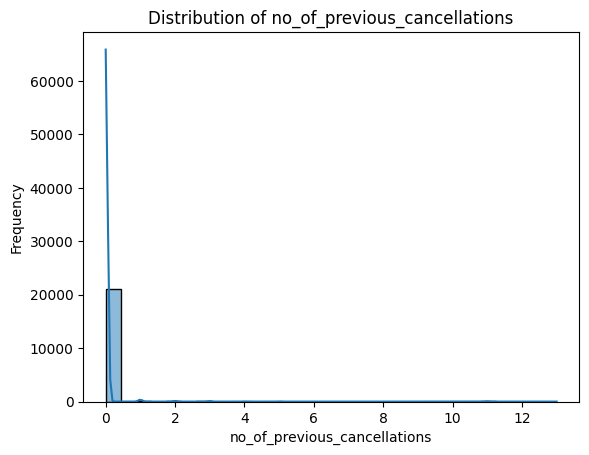

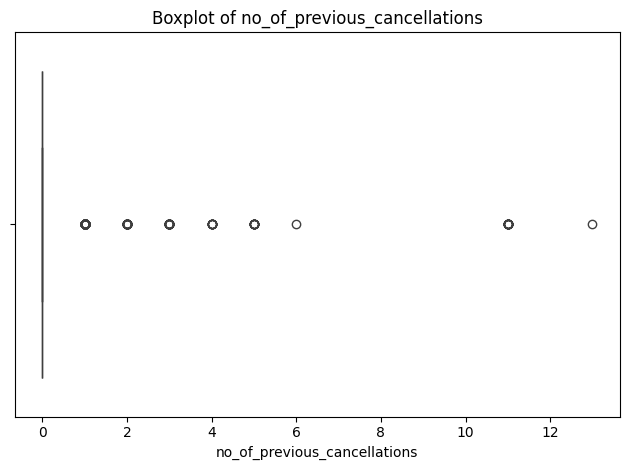

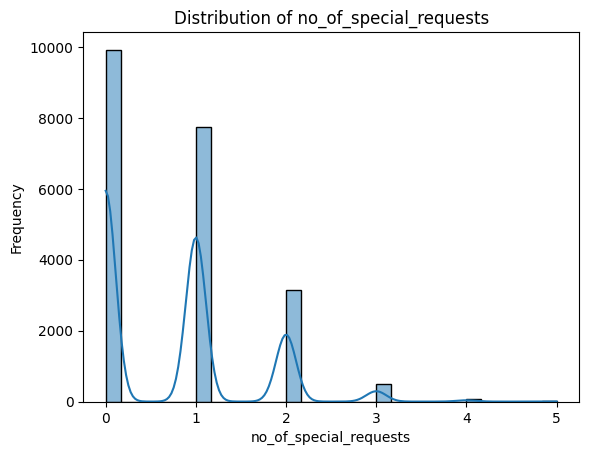

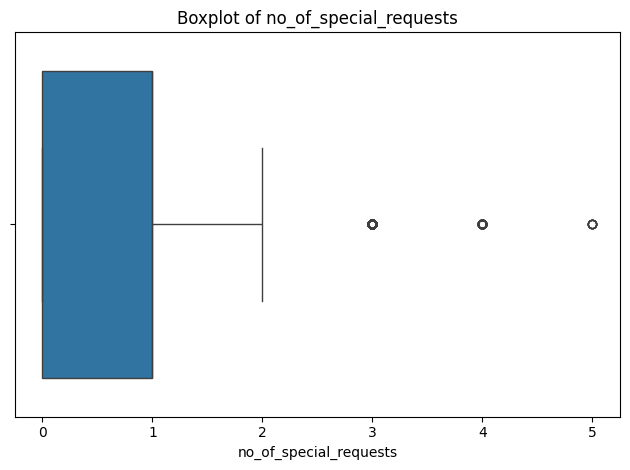

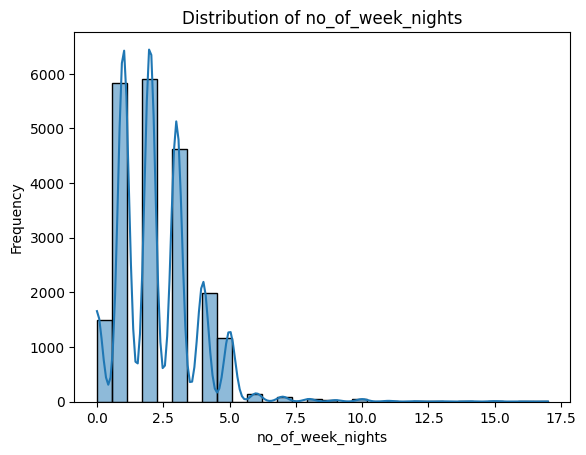

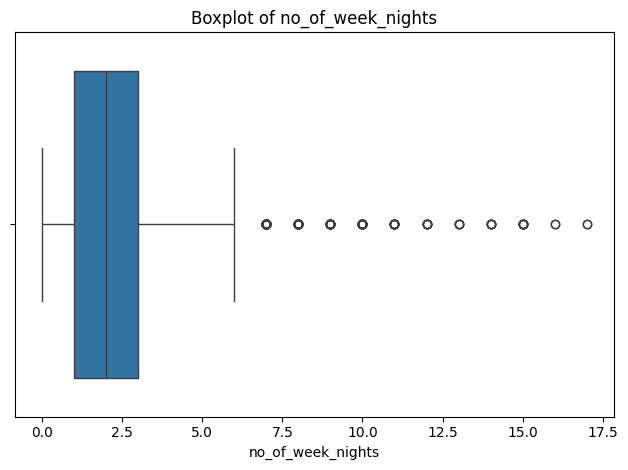

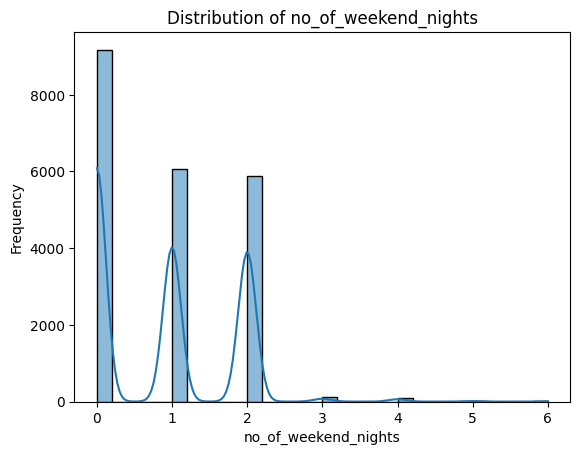

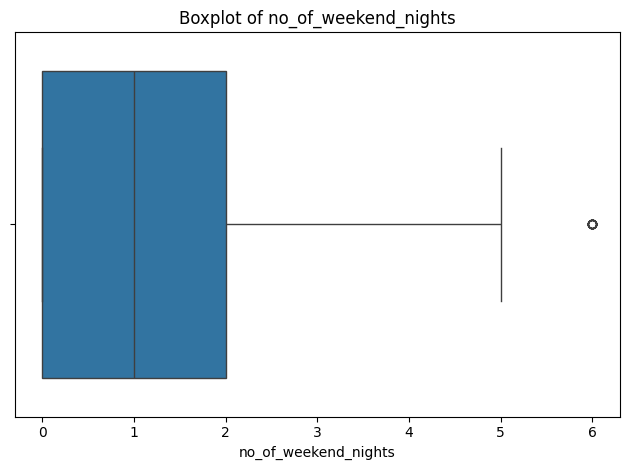

In [107]:
num_plot_distribution(data, numerical_columns)

In [108]:
def categorical_columns_plot(data, column):
    for i,column in enumerate(column):
        plt.figure(figsize=(10, 6))
        sns.countplot(x=data[column], palette='viridis')
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

### Bivariate Analysis

In [109]:
def Bivariate_plots(df, target, numfeatures):
  num_plots=len(numfeatures)
  num_rows = (num_plots + 1) // 2
  fig,axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
  axes = axes.flatten()
  for i, feature in enumerate(numfeatures):
    sns.boxplot(x=target, y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(feature)


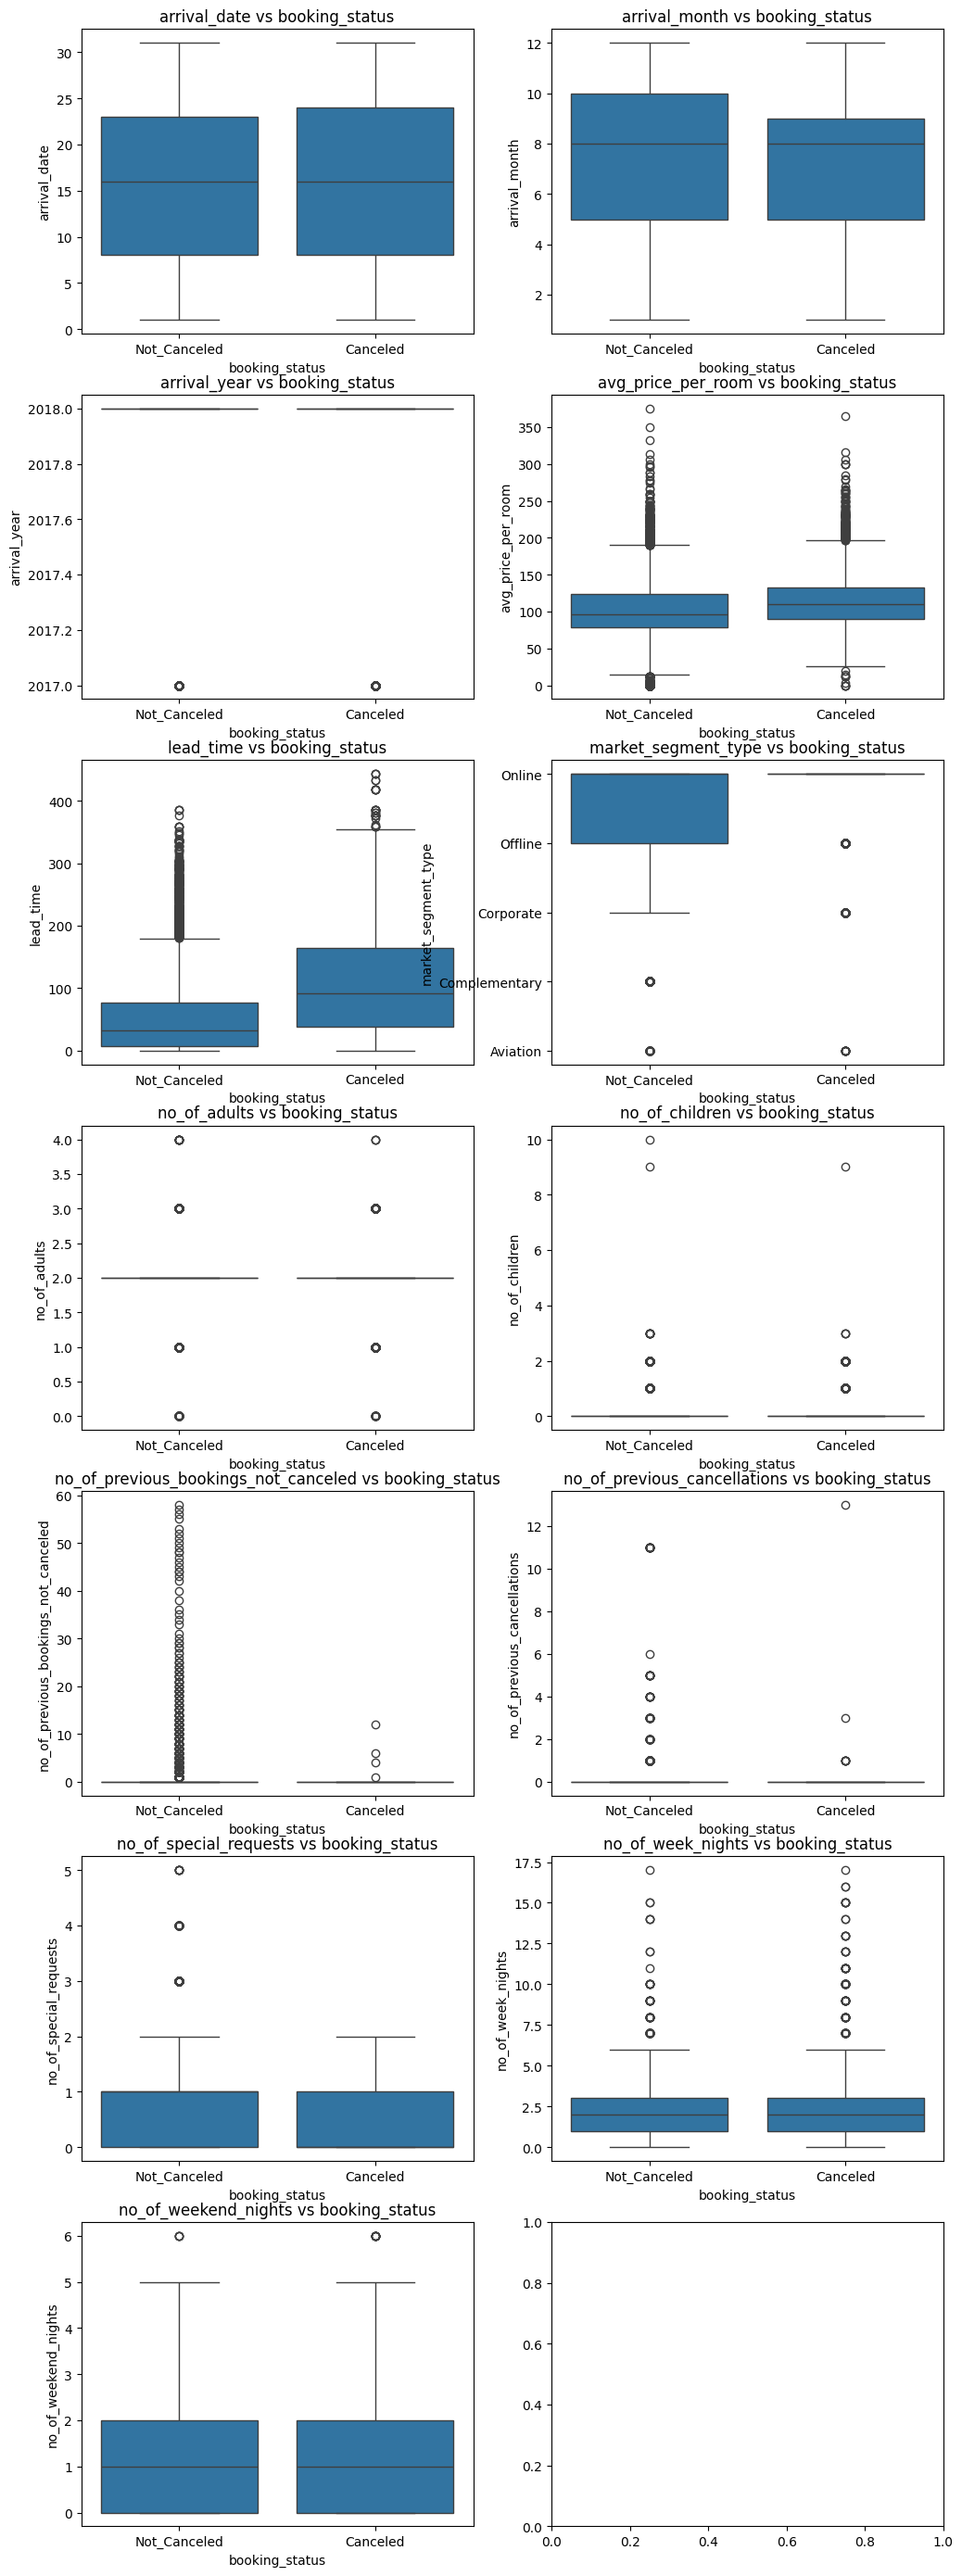

In [110]:
Bivariate_plots(data, 'booking_status', numerical_columns)

In [111]:
def plot_bivariate_cat(df, target,cat_features):
  
  num_features = len(cat_features)
  num_rows = (num_features + 1) // 2
  fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
  axes = axes.flatten()

  for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue=target, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

  plt.tight_layout()
  plt.show()  

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### DATA ENCODING

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le= LabelEncoder()

mapping={}

for col in categorical_columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        mapping[col] = {label:code for label, code in zip(le.classes_ , le.transform(le.classes_))}

In [115]:
mapping

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [116]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

###Multicollinearity

In [118]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [120]:
X= add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [121]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


##Since Vif value for all the factors less than 5, data has low Multicollinearity

In [122]:
corr=df.corr()

<Axes: >

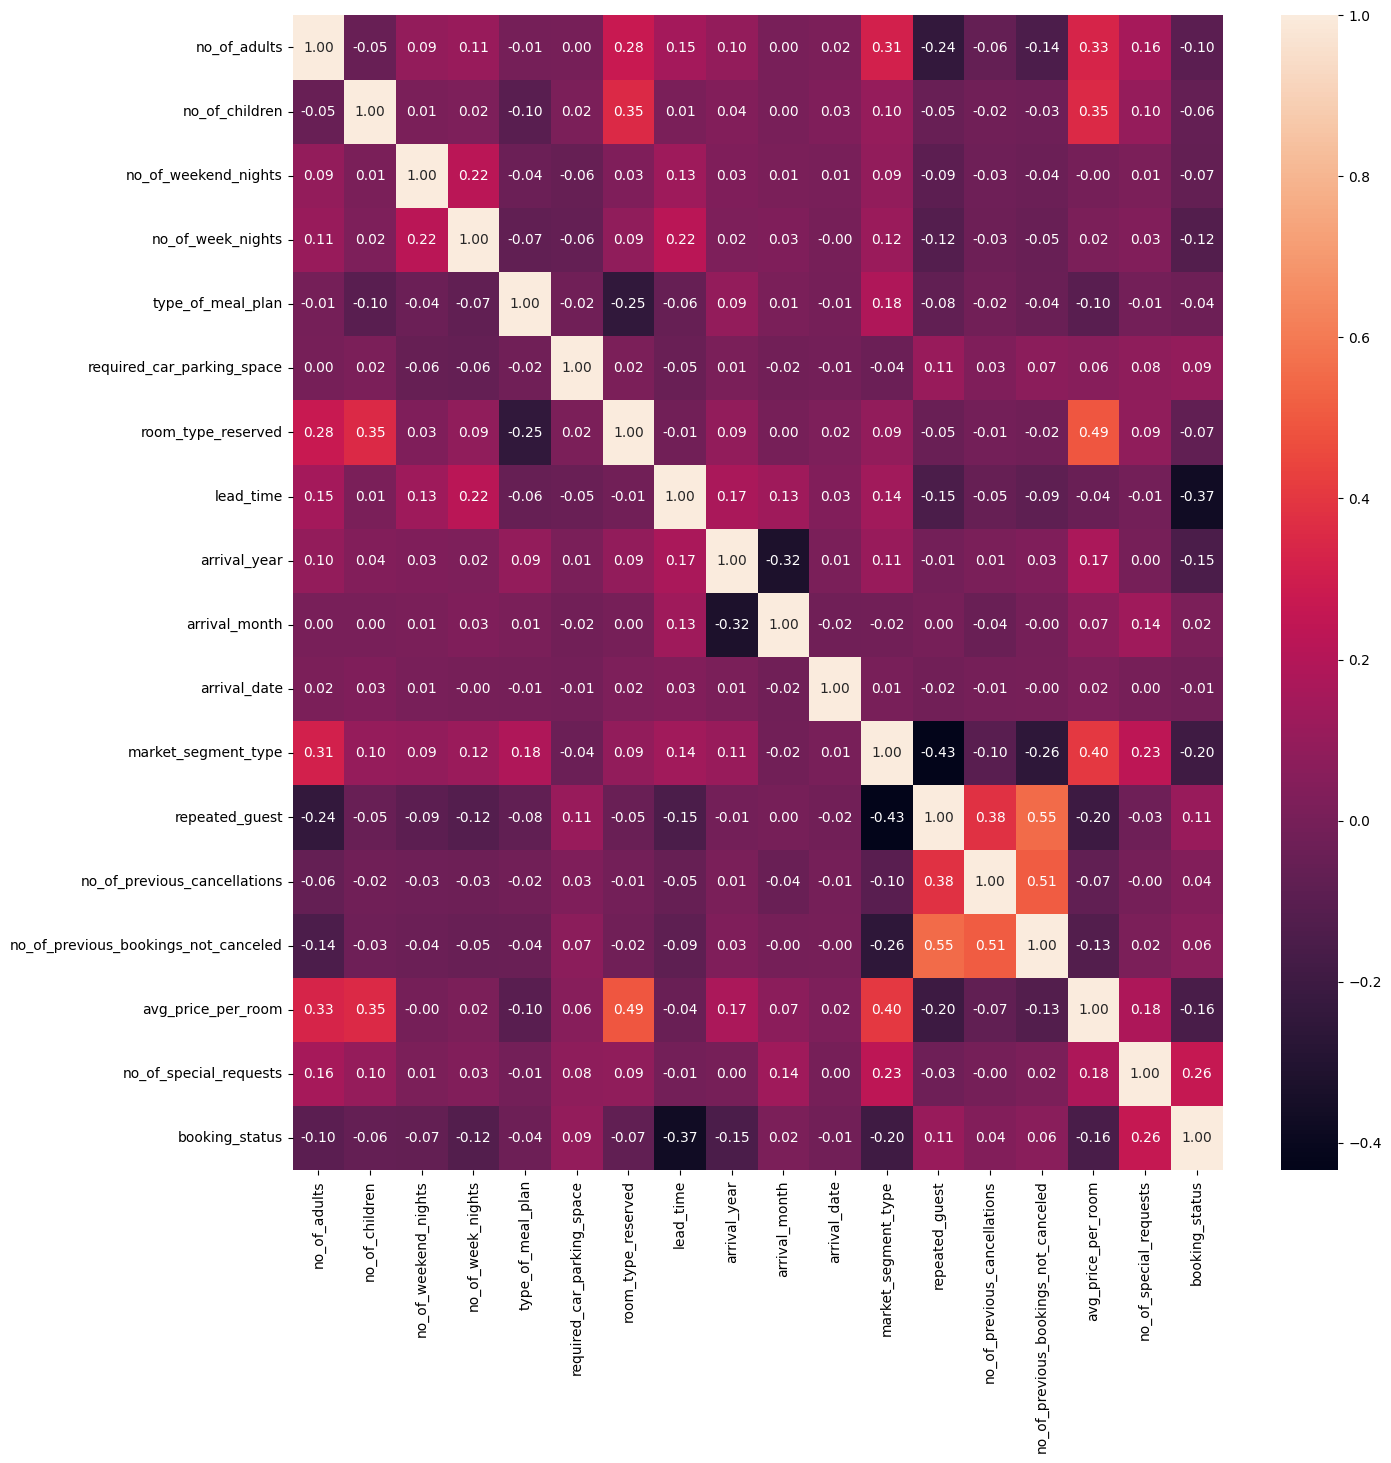

In [123]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.2f')


### Skewness

In [124]:
skewness = df.skew()

In [125]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [126]:
for col in df.columns:
      if abs(df[col].skew()) > 5:
          df[col] = np.log1p(df[col])
          print(f"Applied log transformation to {col} due to skewness.")
      else:
          print(f"No transformation needed for {col}.")

No transformation needed for no_of_adults.
No transformation needed for no_of_children.
No transformation needed for no_of_weekend_nights.
No transformation needed for no_of_week_nights.
No transformation needed for type_of_meal_plan.
No transformation needed for required_car_parking_space.
No transformation needed for room_type_reserved.
No transformation needed for lead_time.
No transformation needed for arrival_year.
No transformation needed for arrival_month.
No transformation needed for arrival_date.
No transformation needed for market_segment_type.
Applied log transformation to repeated_guest due to skewness.
Applied log transformation to no_of_previous_cancellations due to skewness.
Applied log transformation to no_of_previous_bookings_not_canceled due to skewness.
No transformation needed for avg_price_per_room.
No transformation needed for no_of_special_requests.
No transformation needed for booking_status.


### Fixing Data Imbalance

In [129]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [133]:
X = df.drop('booking_status', axis=1)
Y = df['booking_status']

In [134]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0


In [135]:
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: booking_status, dtype: int64

In [152]:
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
Y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [162]:
processed_data="processed_data.csv"
df=pd.read_csv(processed_data)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


## Feature Selection

Due to Courrupted Scikit-Learn files, this operation was performed in a google colab environment

In [163]:
len(df.columns)

18

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
smote= SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

NameError: name 'X' is not defined

## RandomForest feature selection

Due to Courrupted Scikit-Learn files, this operation was performed in a google colab environment

In [8]:
import pandas as pd

df1= pd.DataFrame({"fruit":["apple", "banana", "cherry"],
                   "price":[1.2, 0.5, 2.0]})
df2=pd.DataFrame({"quantity":[10, 20, 30]})

df= pd.concat([df1, df2], axis=1)
df

,fruit,price,quantity
0,apple,1.2,10
1,banana,0.5,20
2,cherry,2.0,30
